## test with real cm vector value of golf ball 

In [ ]:
import math

def make_vec(dist, alfa):
    rad_alfa = math.radians(alfa)
    ax = abs(a_dist * math.cos(rad_alfa))
    ay = abs(a_dist * math.sin(rad_alfa))
    return ax, ay
a_dist = 340
alfa = 10
rng = 10 # range
for i in range(rng):
    print('a_dist ', a_dist)
    print('alfa ', alfa)
    ax , ay = make_vec(a_dist, alfa)
    alfa += 2
    print('ax ', ax)
    print('ay ', ay)
    print('..................')

In [11]:
import math

def make_vec(dist, alfa):
    rad_alfa = math.radians(alfa)
    ax = abs(a_dist * math.cos(rad_alfa))
    ay = abs(a_dist * math.sin(rad_alfa))
    return ax, ay
a_dist = 463.6
a_distz = 452.3
alfa = 15.8
alfaz = 9.6
velocity1 =  a_dist / (1/30)/100
ax , ay = make_vec(a_dist, alfa)
azx , az = make_vec(a_dist, alfaz)

print('a_dist ', a_dist)
print('velocity1 ', velocity1)
print('alfa ', alfa)
print('ax ', ax)
print('ay ', ay)
print('...................')
print('azx ', azx)
print('az ', az)

a_dist  463.6
velocity1  139.08
alfa  15.8
ax  446.0842618001767
ay  126.22912252801028
...................
azx  457.1077627858861
az  77.31399097758501


In [12]:
# GlowScript 3.0 VPython 
# import vpython 
# from  vpython import * 
import random 
import numpy as np 
import json 
print('start') 
local_path = './' 
json_file = 'custom_json.json' 
 
# open(local_path + json_file, 'w').close() 
res_json = {} 
ball_id = 0 
total_frame = 0 
velocity = 0 
angle_degrees =0 
ball_initial_pos = 0 


# Define a function to carry out 1 animation frame. 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -ball.mass * gravity * yhat 
    relative_velocity = ball.velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    ball.force = grav + drag 
    # Calculate the ball's acceleration. 
    ball.acceleration = ball.force / ball.mass 
    # Update the ball's velocity. 
    ball.velocity = ball.velocity + ball.acceleration * dt 
    # Update the ball's position. 
    ball.pos = ball.pos + ball.velocity * dt 
    # Exit this function. 
    return drag, grav 
 
def animate2(): 
  # Calcualte the force(s) on the ball. 
    grav = -mass * gravity * yhat 
    relative_velocity = velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    force = grav + drag 
    # Calculate the ball's acceleration. 
    acceleration = force / mass 
    # Update the ball's velocity. 
    velocity = velocity + acceleration * dt 
    # Update the ball's position. 
    pos = pos + velocity * dt 
    # Exit this function. 
    return drag, grav 

drag_coeff = 25 
 
head_wind_x = -4#-8  # -4 
head_wind_y = 0 
head_wind_z = 0#-4  # 4 

 
head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
################################################################ 
# Create a ball. 
ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 
 
# Set the ball's initial conditions and properties. 
# ball.velocity, ball.pos 
ball.mass = 1900 # in kg 
gravity = 9.8 # in newtons / kg 
yhat = vector(0,1,0) # (x-component, y-component, z-component) 

# v_x, v_y, v_z = (45, 25, 2) 
v_x, v_y, v_z = ax, ay, az
ball.velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
###########################################################################################
ball.pos = vector(0,0,0) # in meters 
initial_x = ball.pos.x 
initial_y = ball.pos.y 
initial_z = ball.pos.z 
 
ball_initial_pos = [ball.pos.x, ball.pos.y, ball.pos.z] 
 
 
 
max_height = ball.pos.y 
distance = ball.pos.x 
 
# Set up the animation loop. 
dt = 0.001 # in seconds 
time = 0 # in seconds 

ball_id = 0 
 
points = [] 
# Animate in a loop. 
number_of_positions = 0 
total_frame = number_of_positions 
res_json["parabola"] = [ ] 
res_json["ball_move"] = [] 
res_json["time"] = [] 
res_json["ball_gravity_force"] = [] 
res_json["ball_acceleration"] = [] 
res_json["relative_velocity2"] = [] 
res_json["ball_velocity"] = [] 
res_json["gravity force"] = [] 
# if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
f = open('3dtr_old.obj', 'w') 
while ball.pos.y >=0 : # Run while this condition is true. 
# Indented means "in the loop" 
    rate(1000) # Frames per second. 
    animate() 
    number_of_positions+=1 
    # Find maximum height. 
    max_height = max(max_height,ball.pos.y) 
    distance = max(distance,ball.pos.x) 
    # Update time. 
    time = time + dt 

    res_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
#     res_json["parabola"].append(ball.pos) 
    res_json["ball_move"].append(ball.pos.x-initial_x) 
    res_json["time"].append(time)

    points.append([ball.pos.x, ball.pos.y, ball.pos.z]) 
    f.write(f'v {ball.pos.x} {ball.pos.y} {ball.pos.z} {200} {200} {200}\n') 
 
 
arrPoints = np.array(points) 
np.save('pointsNumpy', arrPoints) 
#...
print('number of positions: ', number_of_positions) 
print('max height ', max_height) 
print('distance ', distance) 
 
res_json["Id"] = ball_id 
res_json["total_frame"] = total_frame 
res_json["velocity"] = velocity 
res_json["impact_angle"] = angle_degrees 
res_json["init_ball_position"] = ball_initial_pos 
res_json["frame_num"] = {} 
res_json["last_center"] = 0 
# res_json["head_wind"] = head_wind 
res_json["max_height"] = max_height 
res_json["gravity"] = gravity 
# res_json["drag"] = drag 
# res_json["relative_velocity"] = relative.velocity 
# res_json["relative_velocity"] = relative_velocity 
 
f.close() 
with open(local_path + json_file, "w") as f: 
    json.dump(res_json, f, indent="\t") 
 
 
print('done')



start
number of positions:  5339
max height  41.66032068068321
distance  233.14143712616917
done


In [4]:

from  vpython import * 

<IPython.core.display.Javascript object>

## crete trajectory with real ball values 

In [ ]:

import random 
import numpy as np 
import json 
print('start') 
local_path = './' 
json_file = 'custom_json.json' 
res_json = {} 



# Define a function to carry out 1 animation frame. 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -ball.mass * gravity * yhat 
    relative_velocity = ball.velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    ball.force = grav + drag 
    # Calculate the ball's acceleration. 
    ball.acceleration = ball.force / ball.mass 
    # Update the ball's velocity. 
    ball.velocity = ball.velocity + ball.acceleration * dt 
    # Update the ball's position. 
    ball.pos = ball.pos + ball.velocity * dt 
    # Exit this function. 
    return drag, grav 


drag_coeff = 0.00155 # 0.51
 
head_wind_x = 0  # -4 
head_wind_y = 0 
head_wind_z = 0  # 4 : 
 
head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
# Create a ball. 
ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 
 
# Set the ball's initial conditions and properties. 
# ball.velocity, ball.pos 
ball.mass = 0.04593 # in kg  45.93gramm
gravity = 9.8 # in newtons / kg 
yhat = vector(0,1,0) # (x-component, y-component, z-component) 
# drag_coeff = 30.0 
x_v = 300
y_v = 8
angle =15
d_angle = angle/y_v
vel = 80
d_vel = x_v/vel
#     v_x, v_y, v_z = random.randint(45, 55), random.randint(25, 35) ,random.randint(0, 4) 
################################################################ 

v_x, v_y, v_z = (x_v*d_vel*d_angle, y_v*vel*d_angle, 2) 
################################################################ 

ball.velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
ball.pos = vector(0,0,0) # in meters 
initial_x = ball.pos.x 
initial_y = ball.pos.y 
initial_z = ball.pos.z 
 
ball_initial_pos = [ball.pos.x, ball.pos.y, ball.pos.z] 
 
 
 
max_height = ball.pos.y 
distance = ball.pos.x 
 
# Set up the animation loop. 
dt = 0.001 # in seconds 
time = 0 # in seconds 

ball_id = 0 
 
points = [] 
# Animate in a loop. 
number_of_positions = 0 
total_frame = number_of_positions 
res_json["parabola"] = [ ] 
res_json["time"] = []
# if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
f = open('3dtr_old.obj', 'w') 
while ball.pos.y >=0 : # Run while this condition is true. 
# Indented means "in the loop" 
    rate(1000) # Frames per second. 
    animate() 
    number_of_positions+=1 
    # Find maximum height. 
    max_height = max(max_height,ball.pos.y) 
    distance = max(distance,ball.pos.x) 
    # Update time. 
    time = time + dt 
 
    res_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
#     res_json["parabola"].append(ball.pos) 
    res_json["time"].append(time)

    points.append([ball.pos.x, ball.pos.y, ball.pos.z]) 
    f.write(f'v {ball.pos.x} {ball.pos.y} {ball.pos.z} {200} {200} {200}\n') 
#     print('xyz ', ball.pos.x, ball.pos.y, ball.pos.z) 

 
arrPoints = np.array(points) 
np.save('pointsNumpy', arrPoints) 
#...
print('number of positions: ', number_of_positions) 
print('max height ', max_height) 
print('distance ', distance) 
 

# res_json["head_wind"] = head_wind 
res_json["max_height"] = max_height 
res_json["gravity"] = gravity 
f.close() 
 
 
 
print('done')



start


In [ ]:
import vpython 

from  vpython import * 

## create trajectory vector values without visual simulation 

In [8]:
# GlowScript 3.0 VPython 
# import vpython 
# from  vpython import * 
import random 
import numpy as np 
import json 
print('start') 
local_path = './' 
json_file = 'custom_json.json' 
 
# open(local_path + json_file, 'w').close() 
res_json = {} 
ball_id = 0 
total_frame = 0 
velocity = 0 
angle_degrees =0 
ball_initial_pos = 0 


# Define a function to carry out 1 animation frame. 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -mass * gravity * yhat 
    relative_velocity = velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    force = grav + drag 
    # Calculate the ball's acceleration. 
    acceleration = force / mass 
    # Update the ball's velocity. 
    velocity = velocity + acceleration * dt 
    # Update the ball's position. 
    pos = pos + velocity * dt 
    # Exit this function. 
    return drag, grav 
 
def animate2(): 
  # Calcualte the force(s) on the ball. 
    grav = -mass * gravity * yhat 
    relative_velocity = velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    force = grav + drag 
    # Calculate the ball's acceleration. 
    acceleration = force / mass 
    # Update the ball's velocity. 
    velocity = velocity + acceleration * dt 
    # Update the ball's position. 
    pos = pos + velocity * dt 
    # Exit this function. 
    return drag, grav 

drag_coeff = 25 
 
head_wind_x = -4#-8  # -4 
head_wind_y = 0 
head_wind_z = 0#-4  # 4 

 
head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
################################################################ 
# Create a ball. 
ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 
 
# Set the ball's initial conditions and properties. 
# ball.velocity, ball.pos 
mass = 1900 # in kg 
gravity = 9.8 # in newtons / kg 
yhat = vector(0,1,0) # (x-component, y-component, z-component) 

v_x, v_y, v_z = (45, 25, 2) 
v_x, v_y = ax = 200, 50
velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
###########################################################################################
pos = vector(0,0,0) # in meters 
initial_x = pos.x 
initial_y = pos.y 
initial_z = pos.z 
 
ball_initial_pos = [pos.x, pos.y, pos.z] 
 
 
 
max_height = pos.y 
distance = pos.x 
 
# Set up the animation loop. 
dt = 0.001 # in seconds 
time = 0 # in seconds 

ball_id = 0 
 
points = [] 
# Animate in a loop. 
number_of_positions = 0 
total_frame = number_of_positions 
res_json["parabola"] = [ ] 
res_json["ball_move"] = [] 
res_json["time"] = [] 
res_json["ball_gravity_force"] = [] 
res_json["ball_acceleration"] = [] 
res_json["relative_velocity2"] = [] 
res_json["ball_velocity"] = [] 
res_json["gravity force"] = [] 
# if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
f = open('3dtr_old.obj', 'w') 
while pos.y >=0 : # Run while this condition is true. 
# Indented means "in the loop" 
    rate(1000) # Frames per second. 
    animate() 
    number_of_positions+=1 
    # Find maximum height. 
    max_height = max(max_height,pos.y) 
    distance = max(distance,pos.x) 
    # Update time. 
    time = time + dt 

    res_json["parabola"].append([pos.x, pos.y, pos.z]) 
#     res_json["parabola"].append(ball.pos) 
    res_json["ball_move"].append(pos.x-initial_x) 
    res_json["time"].append(time)

    points.append([pos.x, pos.y, pos.z]) 
    f.write(f'v {pos.x} {pos.y} {pos.z} {200} {200} {200}\n') 
 
 
arrPoints = np.array(points) 
np.save('pointsNumpy', arrPoints) 
#...
print('number of positions: ', number_of_positions) 
print('max height ', max_height) 
print('distance ', distance) 
 
res_json["Id"] = ball_id 
res_json["total_frame"] = total_frame 
res_json["velocity"] = velocity 
res_json["impact_angle"] = angle_degrees 
res_json["init_ball_position"] = ball_initial_pos 
res_json["frame_num"] = {} 
res_json["last_center"] = 0 
# res_json["head_wind"] = head_wind 
res_json["max_height"] = max_height 
res_json["gravity"] = gravity 
# res_json["drag"] = drag 
# res_json["relative_velocity"] = relative.velocity 
# res_json["relative_velocity"] = relative_velocity 
 
f.close() 
with open(local_path + json_file, "w") as f: 
    json.dump(res_json, f, indent="\t") 
 
 
print('done')



start


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UnboundLocalError: local variable 'velocity' referenced before assignment

In [1]:
from  vpython import * 

<IPython.core.display.Javascript object>

In [6]:
def animate(mass, gravity, yhat, velocity, head_wind, drag_coeff, dt): 
  # Calcualte the force(s) on the ball. 
    grav = -mass * gravity * yhat 
    relative_velocity = velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    force = grav + drag 
    # Calculate the ball's acceleration. 
    acceleration = force / mass 
    # Update the ball's velocity. 
    velocity = velocity + acceleration * dt 
    # Update the ball's position. 
    pos = pos + velocity * dt 
    # Exit this function. 
    return drag, grav 

In [7]:
mass, gravity, yhat, velocity, head_wind, drag_coeff, dt = 1000, 5, vector(0,1,0), vector(200,50,0), vector(0,0,2), 15,  0.001 # in seconds 

drag, grav =  animate(mass, gravity, yhat, velocity, head_wind, drag_coeff, dt)


UnboundLocalError: local variable 'pos' referenced before assignment

# create 2D projectile 

  message: 'A termination event occurred.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000026AFFE3BBE0>
   status: 1
  success: True
        t: array([0.00000000e+00, 1.76773569e-05, 1.94450926e-04, 1.96218662e-03,
       1.96395435e-02, 1.96413113e-01, 7.69159143e-01, 1.63685333e+00,
       3.02521871e+00, 5.29956021e+00, 6.96804336e+00])
 t_events: [array([6.96804336]), array([2.95486582])]
        y: array([[ 0.00000000e+00,  9.84145385e-04,  1.08248814e-02,
         1.09160535e-01,  1.08542006e+00,  1.02044325e+01,
         3.39615306e+01,  6.04156741e+01,  9.15103716e+01,
         1.27685581e+02,  1.45348690e+02],
       [ 5.56730237e+01,  5.56722854e+01,  5.56649028e+01,
         5.55911912e+01,  5.48652891e+01,  4.85788768e+01,
         3.58223024e+01,  2.63394535e+01,  1.93584830e+01,
         1.27171231e+01,  8.59084421e+00],
       [ 0.00000000e+00,  1.01555772e-03,  1.11702256e-02,
         1.12626058e-01,  1.11818

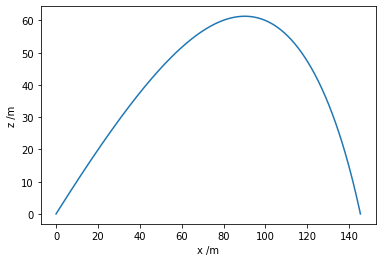

In [52]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Drag coefficient, projectile radius (m), area (m2) and mass (kg).
c = 0.47            # drag coefficent -> An average golf ball will have a drag coefficient of, 0.24 < CD < 0.7
r = 0.02135         # radius diameter(m) = 42.7mm --> r=d/2 convert to meter = 0.02135
A = np.pi * r**2    # area
m = 0.04593         # mass(kg), golf_ball = 45.93 grams

# Air density (kg.m-3), acceleration due to gravity (m.s-2).
rho_air = 1.28
g = 9.81

# For convenience, define  this constant.
k = 0.5 * c * rho_air * A

# Initial speed and launch angle (from the horizontal).
v0 = 80
phi0 = np.radians(45.9)

def deriv(t, u):
    x, xdot, z, zdot = u
    speed = np.hypot(xdot, zdot)
    xdotdot = -k/m * speed * xdot
    zdotdot = -k/m * speed * zdot - g
    return xdot, xdotdot, zdot, zdotdot

# Initial conditions: x0, v0_x, z0, v0_z.
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)

# Integrate up to tf unless we hit the target sooner.
t0, tf = 0, 50

def hit_target(t, u):
    # We've hit the target if the z-coordinate is 0.
    return u[2]

# Stop the integration when we hit the target.
hit_target.terminal = True

# We must be moving downwards (don't stop before we begin moving upwards!)
hit_target.direction = -1

def max_height(t, u):
    # The maximum height is obtained when the z-velocity is zero.
    return u[3]

soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                 events=(hit_target, max_height))

print(soln)
print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

# A fine grid of time points from 0 until impact time.
t = np.linspace(0, soln.t_events[0][0], 1000)

# Retrieve the solution for the time grid and plot the trajectory.
sol = soln.sol(t)
x, z = sol[0], sol[2]
print('Range to target, xmax = {:.2f} m'.format(x[-1]))
print('Maximum height, zmax = {:.2f} m'.format(max(z)))

plt.plot(x, z)
plt.xlabel('x /m')
plt.ylabel('z /m')
plt.show()
 
points = []
# creating .obj (3D) file...
f = open("./trajectory.obj", "w")
for i in range(x.shape[0]):
    f.write(f"v {x[i]} 0 {z[i]}\n")
    
    points.append([x[i], z[i], 0]) 
 
 
arrPoints = np.array(points) 
np.save('2dpointsNumpy', arrPoints) 

f.close()

In [45]:
import numpy as np 
import math as m 
import json
 
def Rx(theta): 
    return np.matrix([[ 1, 0           , 0           ], 
                   [ 0, m.cos(theta),-m.sin(theta)], 
                   [ 0, m.sin(theta), m.cos(theta)]]) 
 
def Ry(theta): 
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)], 
                   [ 0           , 1, 0           ], 
                   [-m.sin(theta), 0, m.cos(theta)]]) 
 
def Rz(theta): 
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ], 
                   [ m.sin(theta), m.cos(theta) , 0 ], 
                   [ 0           , 0            , 1 ]]) 
 
# ------------------------------------------------------------------------------ 
 
degreey = 0
degreex = 0
degreez = 0
    
points = np.load('2dpointsNumpy.npy') 
f = open(f'3dtr_{degreey}.obj', 'w') 
r_json = {}
r_json["parabola"] = [ ] 

points_r = []
points_r2 = []
for i in range(points.shape[0]): 
#     print(i) 
    vec = points[i] 
    rotated_vec = Ry(m.radians(degreey)) * vec.reshape(3, 1) 
    # print(rotated_vec.shape) 
#     r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

 
#     f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n') 
    points_r.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

points_r = np.array(points_r) 

for i in range(points_r.shape[0]): 
#     print(i) 
    vec = points_r[i] 
    rotated_vec = Rx(m.radians(degreex)) * vec.reshape(3, 1) 
    points_r2.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

points_r2 = np.array(points_r2) 
    # print(rotated_vec.shape) 
#     r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

 
#     f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n')
    
    
for i in range(points_r2.shape[0]): 
#     print(i) 
    vec = points_r2[i] 
    rotated_vec = Rz(m.radians(degreez)) * vec.reshape(3, 1) 
    # print(rotated_vec.shape) 
    r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

 
    f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n')
    
    
f.close()


with open("json_file.json", "w") as f: 
    json.dump(r_json, f, indent="\t") 
 
 
print('done')

done


In [56]:
import numpy as np 
import math as m 
import json
 
def Rx(theta): 
    return np.matrix([[ 1, 0           , 0           ], 
                   [ 0, m.cos(theta),-m.sin(theta)], 
                   [ 0, m.sin(theta), m.cos(theta)]]) 
 
def Ry(theta): 
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)], 
                   [ 0           , 1, 0           ], 
                   [-m.sin(theta), 0, m.cos(theta)]]) 
 
def Rz(theta): 
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ], 
                   [ m.sin(theta), m.cos(theta) , 0 ], 
                   [ 0           , 0            , 1 ]]) 
 
# ------------------------------------------------------------------------------ 
 
degreey = 75
degreex = 15
degreez = 0
    
points = np.load('2dpointsNumpy.npy') 
f = open(f'3dtr_{degreey}.obj', 'w') 
r_json = {}
r_json["parabola"] = [ ] 

points_r = []
points_r2 = []
for i in range(points.shape[0]): 
#     print(i) 
    vec = points[i] 
    rotated_vec = Ry(m.radians(degreey)) * vec.reshape(3, 1) 
    # print(rotated_vec.shape) 
#     r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

 
#     f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n') 
    points_r.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

points_r = np.array(points_r) 

for i in range(points_r.shape[0]): 
#     print(i) 
    vec = points_r[i] 
    rotated_vec = Rx(m.radians(degreex)) * vec.reshape(3, 1) 
    points_r2.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

points_r2 = np.array(points_r2) 
    # print(rotated_vec.shape) 
#     r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

 
#     f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n')
    
    
for i in range(points_r2.shape[0]): 
#     print(i) 
    vec = points_r2[i] 
    rotated_vec = Rz(m.radians(degreez)) * vec.reshape(3, 1) 
    # print(rotated_vec.shape) 
    r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

 
    f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n')
    
    
f.close()


with open("json_file.json", "w") as f: 
    json.dump(r_json, f, indent="\t") 
 
 
print('done')


def draw_polylines(frame, coords_list, RGB):
    coords_list = np.array(coords_list)
    
    frame = cv2.polylines(
        frame, [coords_list],
        isClosed=False, color=(int(RGB[2]), int(RGB[1]), int(RGB[0])),
        thickness=10
    )
    
    coords_list = np.ndarray.tolist(coords_list)
    return coords_list, frame

import numpy as np
import cv2
import json
path_v = 'data/golf_v.mp4'


cap = cv2.VideoCapture(path_v)  # read video 
# cap = cv2.VideoCapture(0)
if (cap.isOpened()== False):   # Check if camera opened successfully
    print("Error opening video stream or file")
    
RGB = np.random.randint(0, 256, size=3)  # 0~255 의 숫자 3개를 랜덤하게 가져옴
RGB = (0, 256, 3)
video_fps = cap.get(cv2.CAP_PROP_FPS),
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f" Frame Per second: {video_fps } \n Total Frames: {total_frames} \n Height: {height} \n Width: {width}")

# Define the codec and create VideoWriter object
width, height = 1080, 1920   # assign nnew video width and height 
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # *'mp4v' *'XVID'
out = cv2.VideoWriter('output.mp4',fourcc, 20.0, (width,height)) #(int(cap.get(3)),int(cap.get(4)))) # size (int(cap.get(3)),int(cap.get(4)))

coords_list2 =[]
coords_list_cir2 =[]
jsonfile = "json_file.json"
# jsonfile = "custom_json.json"

with open(jsonfile, "r") as f: 
    json_f = json.load(f)
    pr = json_f["parabola"]
    for i in (json_f["parabola"]):
        scale = 10
        coords_list2.append([int(i[0]*scale+420), int(i[1]*(-scale)+1300)]) #= [json_f["parabola"], json_f["parabola"]]
    
    for i in range(0, len(json_f["parabola"]), 20):
        scale2 = 20000
        coords_list_cir2.append([int(pr[i][2]*scale2+420), int(pr[i][1]*(-scale2)+1300)]) #= [json_f["parabola"], json_f["parabola"]]
    
# print('len 1 ', len(coords_list_cir))
# print('len 2 ', len(coords_list))
# print('len 1 ', (coords_list_cir))
# print('len 2 ', (coords_list))

coords_list =[]
# coords_list_cir =[]

ts = 1  
cur = 3
cur_m = -1
while(cap.isOpened()):
    cur_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    ts = cur_frame
    ret, frame = cap.read()            
    frame = cv2.flip(frame,0)

    if ret==True:
#         print('TOTAL FRAME ', total_frames)
        frame = frame[0:height, 0:width]   # resize video
#         if cur> 30:
#             print("ng pro")
#         if cur < int(total_frames):
#             a = 23
# #             print("addss")
            
            
#         if  cur < int(total_frames):
# #             print("adding pro")

#             print("adding pro")
#         else: 
#             continue
        cur2 = 1
        if ts <30:
            coords_list.append([int(0*scale+420), int(0*(-scale)+1300)])

        if ts > 40 and len(pr)>cur:
            coords_list.append([int(pr[cur][0]*scale+420), int(pr[cur][1]*(-scale)+1300)])
            cur_m -1
            cur +=65 + cur_m
#             cur2 = 1
        coords_list, frame = draw_polylines(frame, coords_list, RGB)
        

    #         center_coordinates = coords_list_cir[ts][0],coords_list[ts][1]
        center_coordinates = 450, 1300

        radius = 10
        color = (0,255,0)
        thickness = 15
        image = cv2.circle(frame, center_coordinates, radius, color, thickness)


#         coords_list, frame = draw_polylines(frame, coords_list, RGB)
        # write the flipped frame
        out.write(frame)
        ts += 1
        cur2 +=5
#         cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

done
 Frame Per second: (30.007554644558898,) 
 Total Frames: 237.0 
 Height: 1920.0 
 Width: 1080.0
